### changes in polygon edge/vertex position 



Testing whether there were any changes in polygons' area and/or geometry. Once we apply geoplanar to fix planar violations, the expected behavior is that we can compare raw and clean dataframes to check for any changes in their respective area. We find that polygons have shifted their edges/vertices randomly. The example below shows an example of Texas (mutlipolygon). 

In [20]:
import geopandas as gpd

df = gpd.read_parquet("../geoplanar/datasets/usmex/usmex_1.parquet")
df2 = gpd.read_parquet("../geoplanar/datasets/usmex/final_usmex1.parquet")

In [21]:
tx = df[df.NAME_1=="Texas"] 
tx = tx.explode()
tx.geometry

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  


73  0      POLYGON ((-97.21570 25.97014, -97.21570 25.970...
    1      POLYGON ((-97.17458 25.98125, -97.17458 25.981...
    2      POLYGON ((-97.27708 26.24042, -97.27708 26.240...
    3      POLYGON ((-97.27847 26.24403, -97.27847 26.244...
    4      POLYGON ((-97.28098 26.25097, -97.28098 26.251...
                                 ...                        
    254    POLYGON ((-96.57306 28.65667, -96.57257 28.656...
    255    POLYGON ((-96.57207 28.69083, -96.57111 28.690...
    256    POLYGON ((-96.57970 28.69389, -96.57722 28.693...
    257    POLYGON ((-96.65595 28.71873, -96.65556 28.718...
    258    POLYGON ((-96.44866 28.75027, -96.44836 28.750...
Name: geometry, Length: 259, dtype: geometry

In [22]:
tx2 = df2[df2.NAME_1=="Texas"] 
tx2 = tx2.explode()
tx2.geometry

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  


73  0      POLYGON ((-97.13000 27.90417, -97.12972 27.904...
    1      POLYGON ((-97.12155 27.91134, -97.12167 27.911...
    2      POLYGON ((-97.12000 27.92139, -97.11972 27.921...
    3      POLYGON ((-97.14944 28.03028, -97.14944 28.031...
    4      POLYGON ((-97.15444 28.05278, -97.15417 28.052...
                                 ...                        
    254    POLYGON ((-97.36458 27.79020, -97.36424 27.789...
    255    POLYGON ((-97.49994 27.37181, -97.49994 27.372...
    256    POLYGON ((-97.52722 27.42278, -97.52722 27.423...
    257    POLYGON ((-97.74277 27.42639, -97.74250 27.426...
    258    POLYGON ((-103.34054 29.02285, -103.34093 29.0...
Name: geometry, Length: 259, dtype: geometry

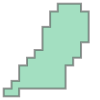

In [25]:
tx.iloc[0].geometry   # original df position

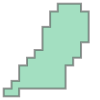

In [26]:
tx2.iloc[108].geometry # new df position, changed to 108

The original polygon changed from positon 0 to position 108. No function was applied to change the ordering, it just happens randomly. This change triggers a false change of the polygon's geometry.